## Grover's Algorithm
- Week1 , exercise B
- What is a quantum algorithm? It is just an algorithm which takes advantage of -
    - Quantum interference
    - Quantum Superposition
    - Quantum entanglement
 

- We have an <b>unsorted list of elements</b> from which we want to find a particular element .
- We have an ORACLE(fancy name for a checker) : a black box which gives a yes or no answer corresponds to an input number 

## Classical Approach
- Keep on searching the list until you actually find the <b>WINNER</b> and then return true
- Note that this requires $O(N)$ time for the search in the worst case


## Quantum Approach 
- Grover's algorithm is an algorithm which actually reduces the running time of an algorithm QUADRATICALLY.
- Worst case time for grover's algorithm : $(O\sqrt{N}) $

In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector,plot_histogram
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

## Implementing Grover's algorithm 
- Implementing a two-qubit algorithm 
- It has four states -> |00>, |01>, |10> and |11>
- Let us suppose <font color='red'>Winner is |11></font>
### ORAClE 
- ORACLE is just a diagonal matrix which is used to flip the sign of our winning state.
- Eg. If we have a 2 qubit implementation, we have four states 
$U_{x} = \begin{bmatrix} \ 1 \ 0 \  0 \ 0 \\ \ 0 \ 1 \ 0 \ 0 \\ \ 0 \ 0 \ 1 \ 0 \\ \ 0 \ 0 \ 0 \ -1 \end{bmatrix} $
for the winning state |11>

- We need the oracle to FLIP the sign of the <font color='red'> Winning state </font>.
- Cz gate is used for this.

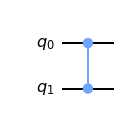

In [2]:
oracle = QuantumCircuit(2)#,name='oracle')
oracle.cz(0,1) # A circuit to invert sign of |11> state 
# flips the sign of the target 
# when control is 1
oracle.draw(output='mpl')

## Checking if oracle works
- Simultaneously send the four states of a 2-qubit system to the oracle 


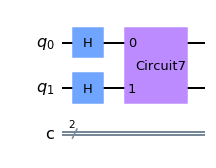

In [3]:
circuit = QuantumCircuit(2,2)
circuit.h([0,1])
circuit.append(oracle,[0,1])
circuit.draw(output='mpl')

In [5]:
#circuit.measure([0,1],[0,1])
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend).result()
SV = result.get_statevector()
print(SV)

[ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]


{'00': 2442, '01': 2566, '10': 2452, '11': 2540}


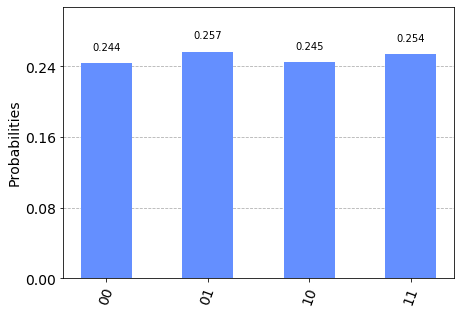

In [17]:
# histogram
circuit = QuantumCircuit(2,2)
circuit.h([0,1])
circuit.append(oracle,[0,1])
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')
backend2 = Aer.get_backend('qasm_simulator')
result2 = execute(circuit,backend2,shots=10000).result()
counts = result2.get_counts()
print(counts)
# plt.title("Histogram for counts of the States")
plot_histogram(counts)


## Amplitude Amplification
- At the current point, the probabilities of our states are equal
- We need something which could actually <font color='cyan'>AMPLIFY PROBABILITY</font> of the state vector corresponding to the winning state
- This procedure stretches out (amplifies) the amplitude of the marked item, which shrinks the other items' amplitudes, so that measuring the final state will return the right item with near-certainty.
- The algorithm's geometric feel can be obtained in terms of two reflections, which do a rotation in the 2D plane.

### Matrix representation
- In our example winning state is $|w>$ = 
$ \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} $

- In the example, the equal superposition state ( 1/2 is the normalization factor) is $|s>$ =
$ \frac{1}{2}$ $ \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} $

- These two vectors are almost orthogonal but not quite, <w|s> is 1/2

- Orthogonal state to $|w>$ is a state $|s'>$ which is just $|s>$ with the $|w>$ component removed from it. Let us see how this is -
    - $|s'> = $  $\frac{1}{\sqrt{3}}$  $\begin{bmatrix} 1 \\ 1 \\ 1 \\ 0 \end{bmatrix}$
        - $\frac{1}{\sqrt{3}}$ is the normalization factor


## First rotation -
- After applying the oracle, just flip the state about the |s'>

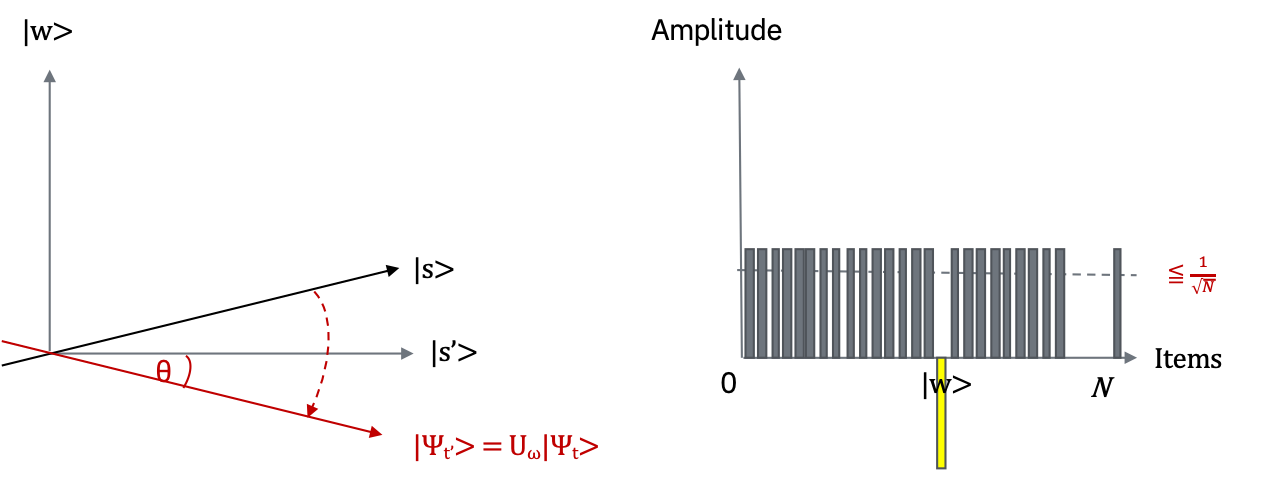

In [49]:
Image("../../exercises/week-1/step1.png",width=650)

## Making a Reflection operator
- A reflection operator is needed to actually amplify the amplitude of our generalized superposition state or more bluntly, rotate our general superposition nearer to the |w> state after  each of our iterations.

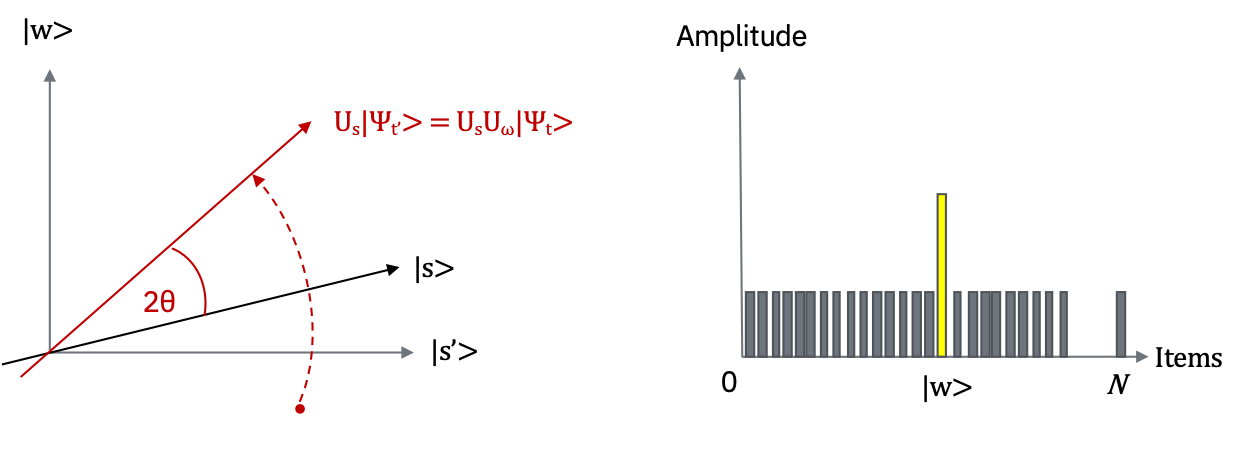

In [20]:
from IPython.display import Image
Image("../../exercises/week-1/step2.png", width="700")

- After $t$ steps, the state will have transformed to $|\psi_{t}\rangle = (U_{s}U_{w})^{t}|\psi_{0}\rangle$.

- After subsequent rotations, we will see that if we measured our final state $|\psi _{t}\rangle$ then it would be with very high probability that we would find the index of the item we associated with our winning state $|w\rangle$, that we wanted to search

## The actual Meaning of reflection 2
- The line <font color='red'> Reflection about any state means adding negative phase to every state orthogonal to that state </font> is understood by me now.
- Since reflection is done about the state |s>, means that whatever orthogonal things are contributing to your state vector along one side of |s>, if they start contributing to the other side of |s>, the vector has been REFLECTED.....


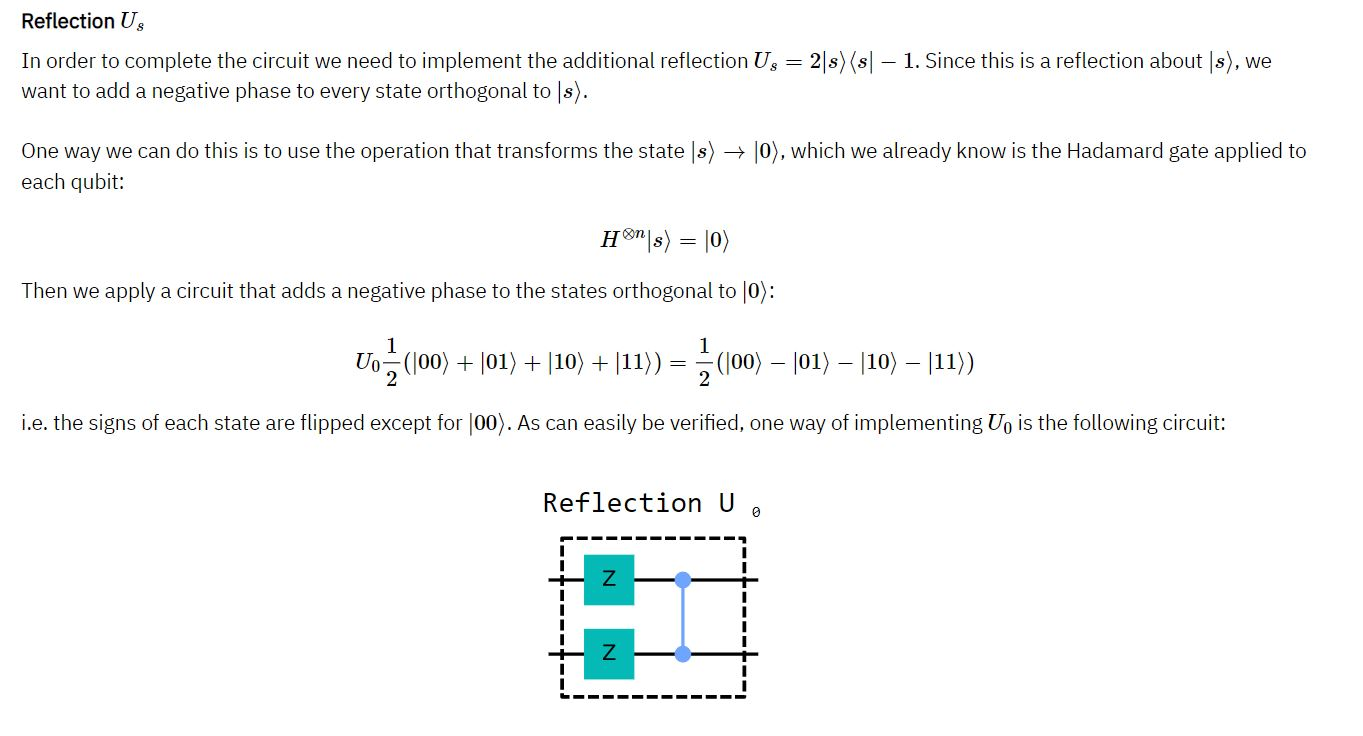

In [25]:
Image("reflection2_1.JPG",width=700)

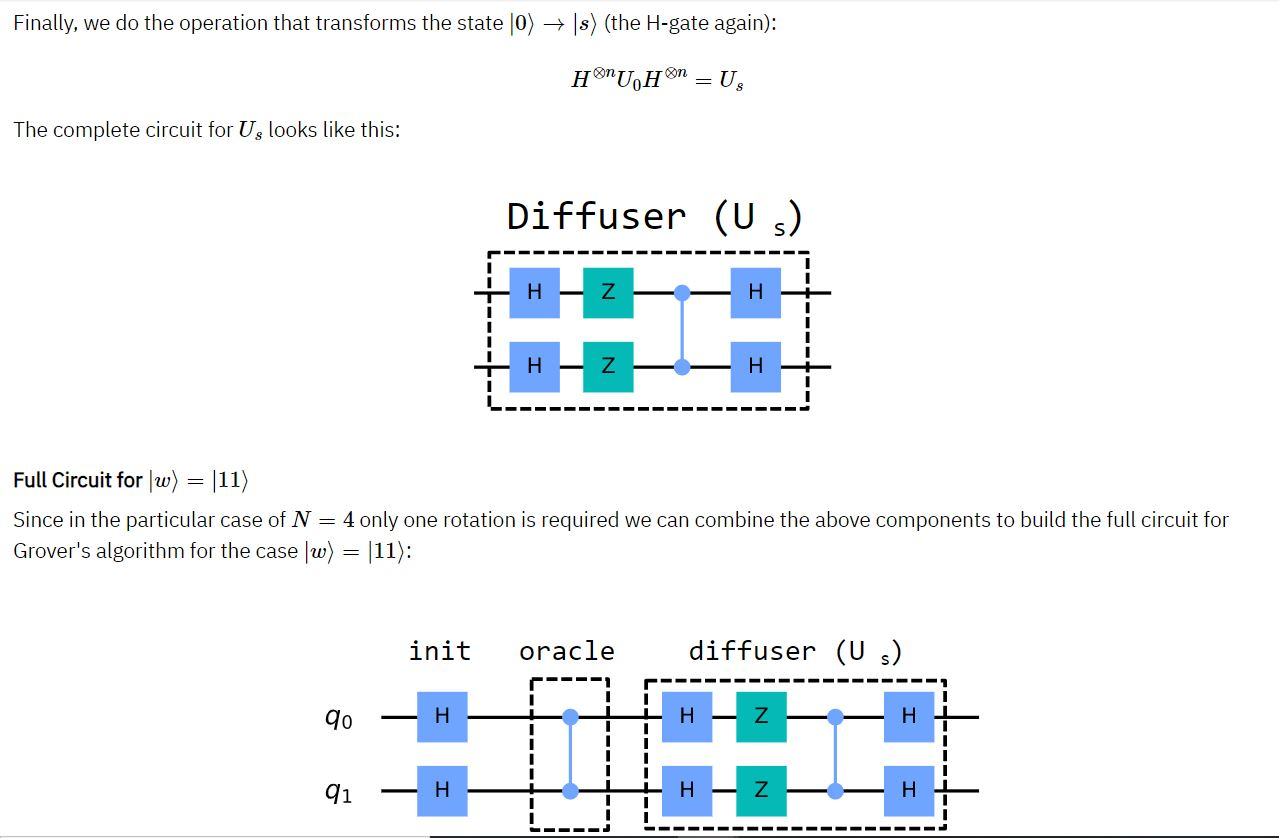

In [24]:
Image("reflecion2_2.JPG")

## Now let us make the GROVER algo for two qubit system 


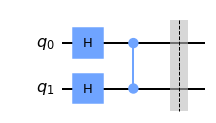

In [4]:
# ORACLE 
oracle = QuantumCircuit(2,name='oracle')
oracle.h([0,1])# make equal superposition
oracle.cz(0,1)# flip the state
oracle.barrier()
oracle.draw(output='mpl')

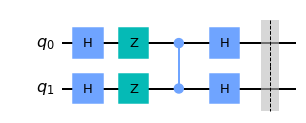

In [5]:
# Diffusion operator
diffusion = QuantumCircuit(2,name='diffusion')
diffusion.h([0,1]) # made |s> into |0> 
diffusion.z([0,1]) # flipped phases of the states orthogonal to |0> 
diffusion.cz(0,1) # because |11> would actually flip twice :D 
diffusion.h([0,1])# obtain the state back with phases flipped 
diffusion.barrier()
diffusion.draw(output='mpl')

### Making the circuit for the winning state |11>

In [6]:
Q = QuantumCircuit(2,2)
Q.append(oracle,[0,1])
Q.append(diffusion,[0,1])

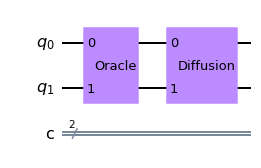

In [7]:
Q.draw(output='mpl')

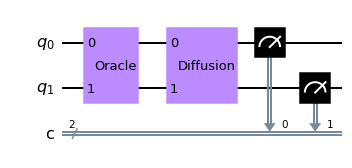

In [8]:
Q.measure([0,1],[0,1])
Q.draw(output='mpl')

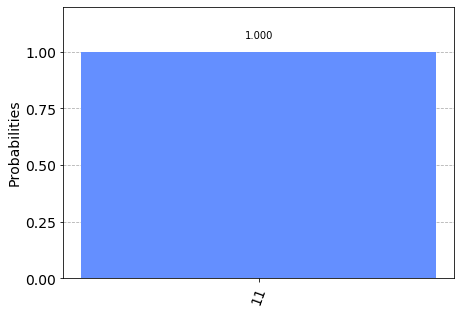

In [9]:
backend = Aer.get_backend('qasm_simulator')
result = execute(Q,backend).result()
count = result.get_counts()
plot_histogram(count)

## Well, atleast I have implemented although I still need to see what exactly are we searching here?

In [17]:
# Using the real devices for executing circuits 
IBMQ.load_account()

E:\ANACONDA\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-12-29 11:35:40,449: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = IBMQ.get_provider(hub='ibm-q')
from qiskit.providers.ibmq import least_busy

In [12]:
#code to get the least busy backend...
backend_lb = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
print("Least busy backend: ", backend_lb)

Least busy backend:  ibmq_valencia


In [15]:
from qiskit.tools.monitor import job_monitor
# sending experiment to ibmq valencia...
backend = backend_lb 
shots = 5000
job_experiment = execute(Q,backend = backend, shots = shots)
job_monitor(job_experiment,interval=1)

Job Status: job has successfully run


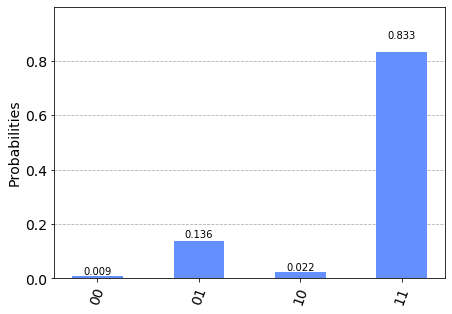

In [16]:
counts = job_experiment.result().get_counts()
plot_histogram(counts)

### So yes, we have successfully executed a job on the real quantum device and got back results as we expected.
### There is surely noise present in our results which would me mitigated as we advance further.

In [ ]:
orc_2 = QuantumCircuit(4)
# oracle acting on 4 qubits with the winner state 
# as 0111 , so how do you filp it's phase? 
orc_2